<a href="https://colab.research.google.com/github/202218031/DM_Project_1/blob/202218024_Harshita/Data_Mining_Project_File_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df=pd.read_csv('/content/drive/MyDrive/CSV Files/diamonds.csv')

# **Data Description**

# **What is the size of data?**

In [ ]:
df.shape

(219703, 26)

# **How does the data look like?**

In [ ]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


# **What are the datatypes of columns?**

In [ ]:
df.dtypes

Unnamed: 0                       int64
cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price        

# **Does the data contain missing values?**

In [ ]:
print(df.isnull().sum())

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


# **Are there any duplicates?**

In [ ]:
df.duplicated().sum()

0

# **How does the data look like mathematically?**

In [ ]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


# **What are the number of unique values in each column?**

In [ ]:
df.nunique()

Unnamed: 0                     219703
cut                                11
color                              11
clarity                            11
carat_weight                      878
cut_quality                         6
lab                                 3
symmetry                            5
polish                              5
eye_clean                           5
culet_size                          9
culet_condition                     4
depth_percent                     534
table_percent                     235
meas_length                      1415
meas_width                       1155
meas_depth                        852
girdle_min                         10
girdle_max                         10
fluor_color                         6
fluor_intensity                     8
fancy_color_dominant_color         13
fancy_color_secondary_color        11
fancy_color_overtone                9
fancy_color_intensity              10
total_sales_price               22202
dtype: int64

## dropping the first column which is unnamed and acts like an index

In [14]:
df = df.drop(df.columns[0], axis=1)

## plotting the heatmap to know the correlation between features.

<ipython-input-17-34d5b4471462>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


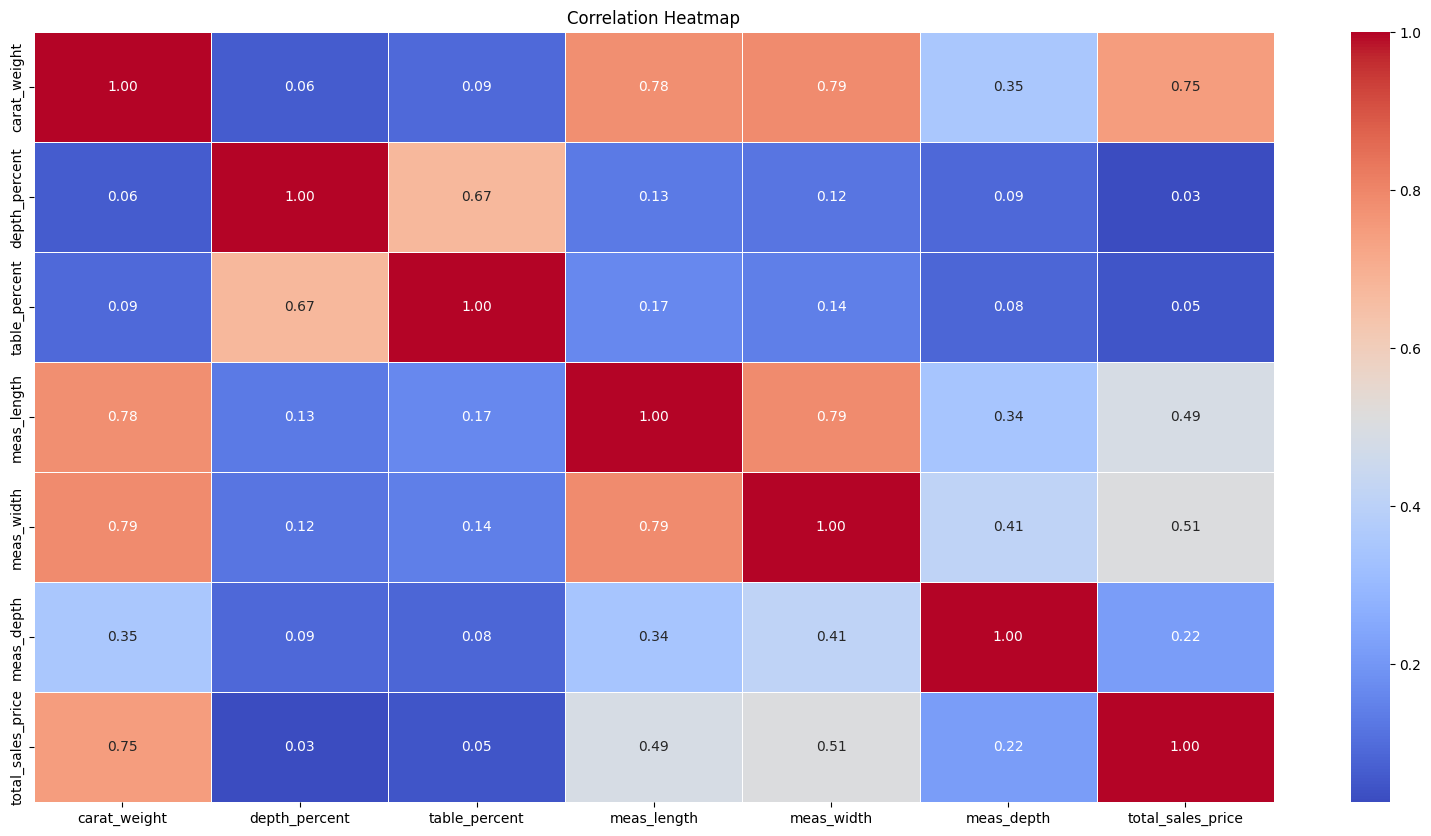

In [17]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

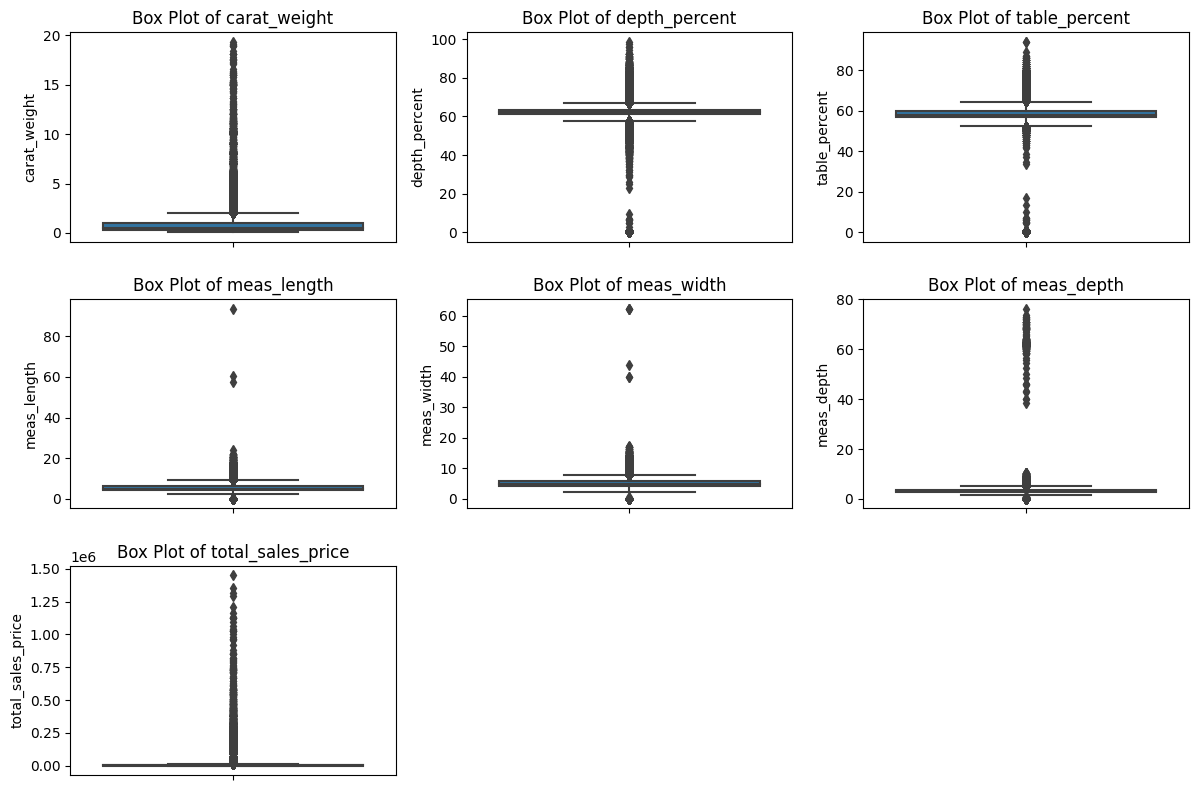

In [56]:
numerical_columns = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

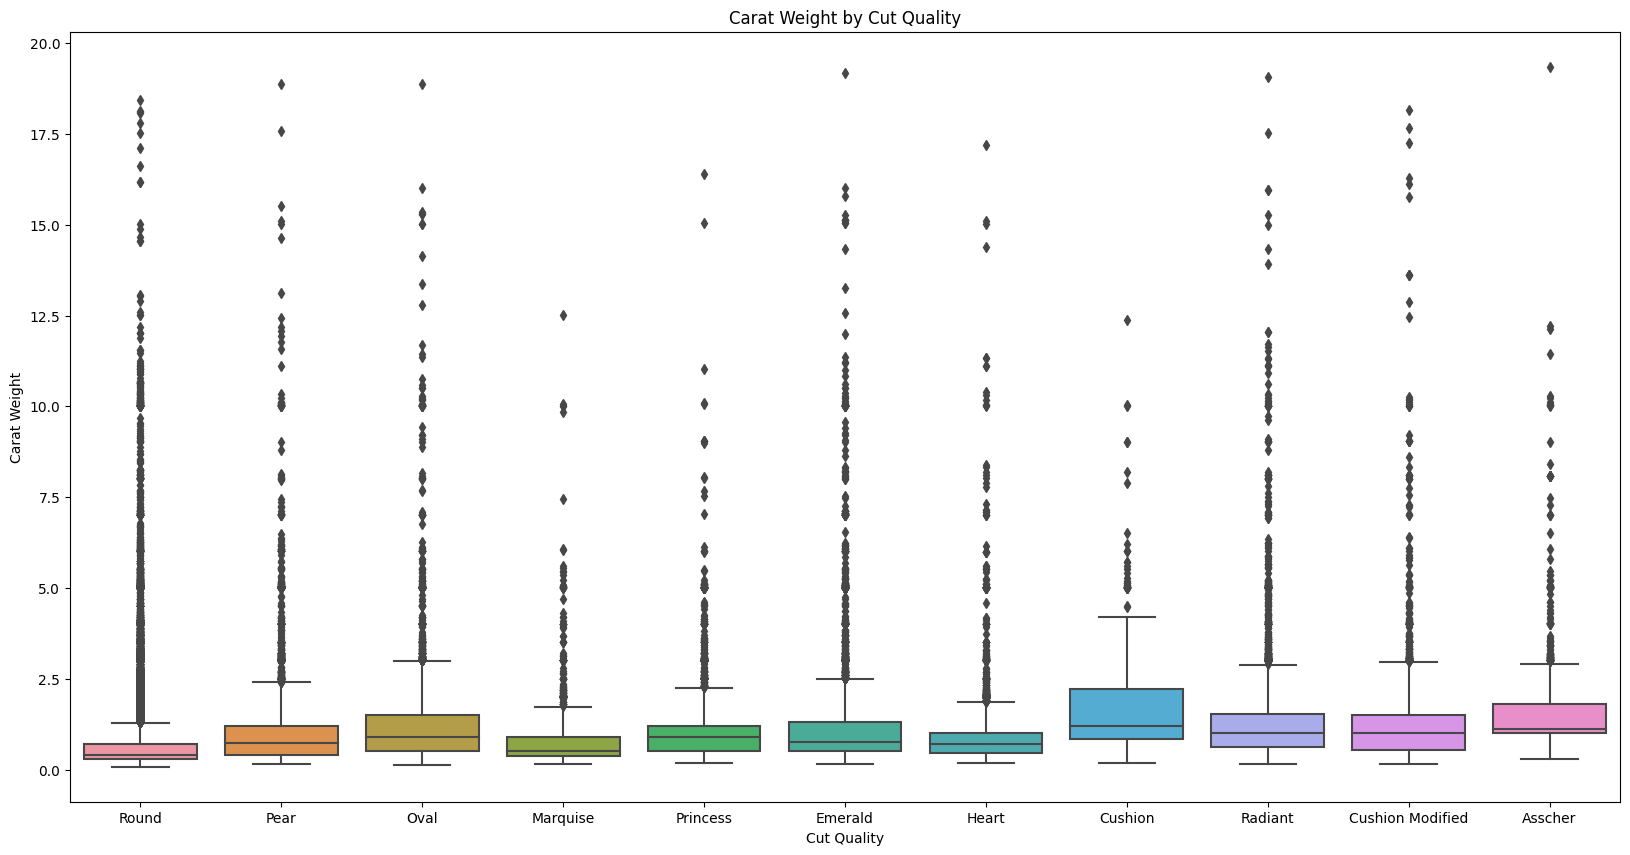

In [15]:
# Boxplot of carat_weight vs. cut
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='cut', y='carat_weight')
plt.title("Carat Weight by Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Carat Weight")
plt.show()

In [53]:
# Find columns containing "unknown"
columns_with_unknown = df.columns[df.isin(['None']).any()].tolist()

# Print the list of columns
print("\nColumns containing 'unknown':", columns_with_unknown)



Columns containing 'unknown': ['fluor_intensity', 'fancy_color_overtone']


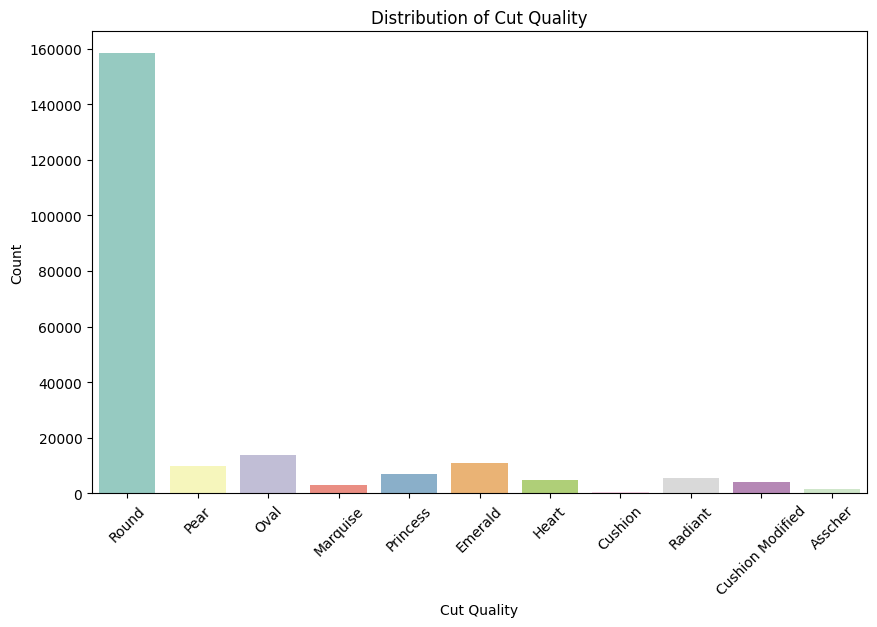

In [19]:
# Bar Chart of Cut Quality vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cut', palette='Set3')
plt.title("Distribution of Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

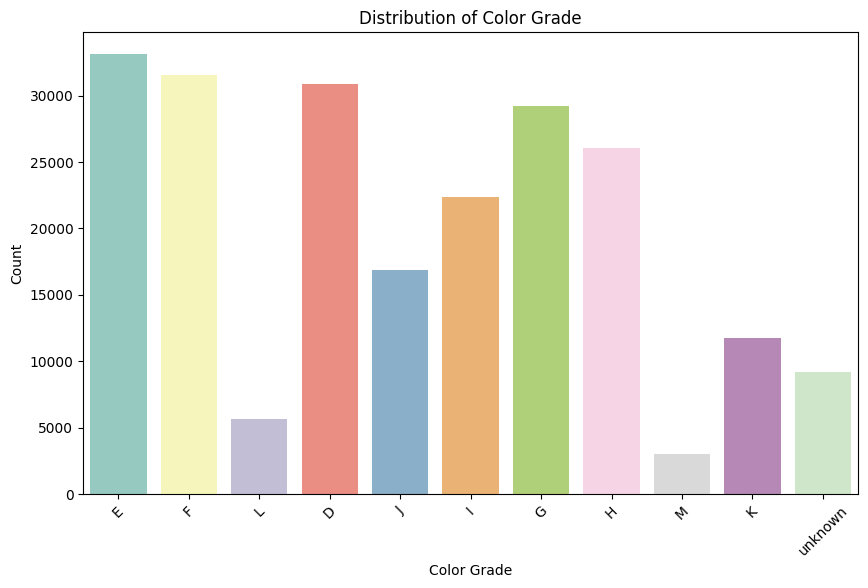

In [20]:
# Bar Chart of Color vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='color', palette='Set3')
plt.title("Distribution of Color Grade")
plt.xlabel("Color Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

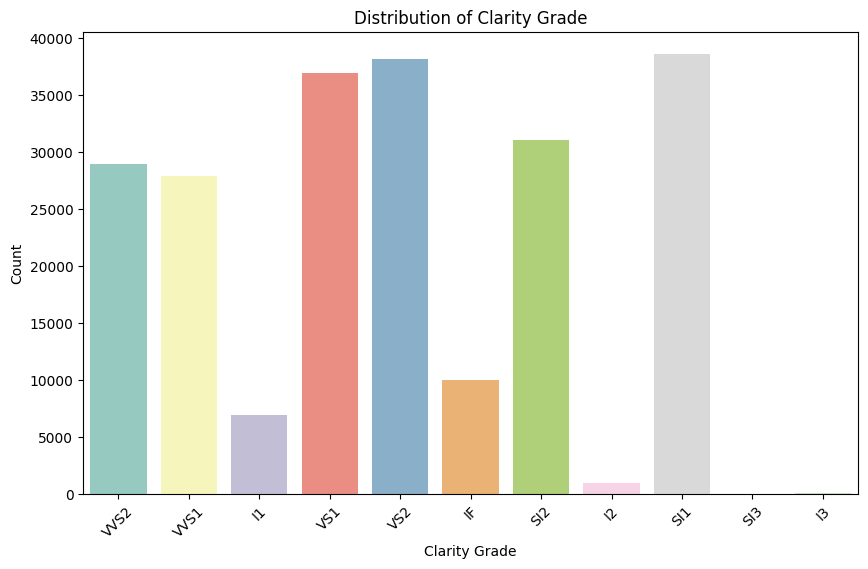

In [21]:
# Bar Chart of Clarity vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clarity', palette='Set3')
plt.title("Distribution of Clarity Grade")
plt.xlabel("Clarity Grade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


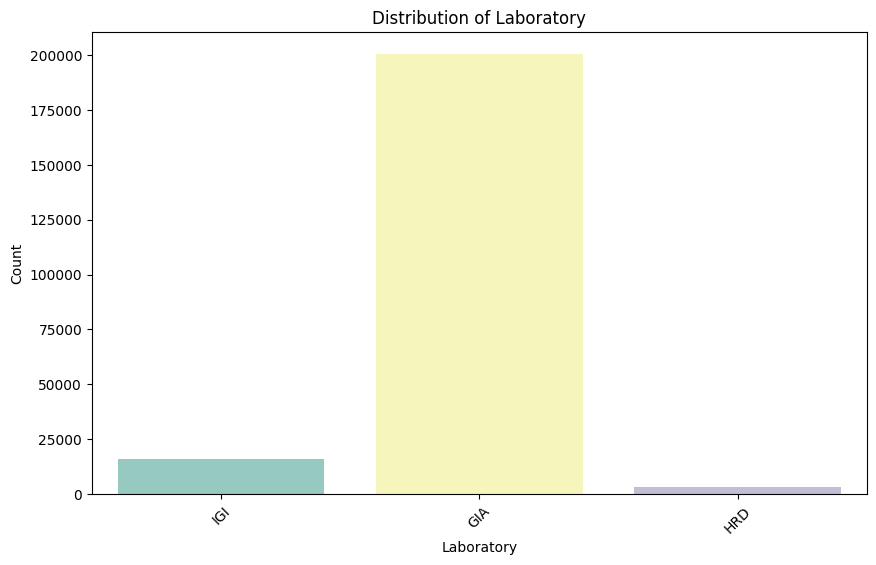

In [22]:
# Bar Chart of Lab vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='lab', palette='Set3')
plt.title("Distribution of Laboratory")
plt.xlabel("Laboratory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

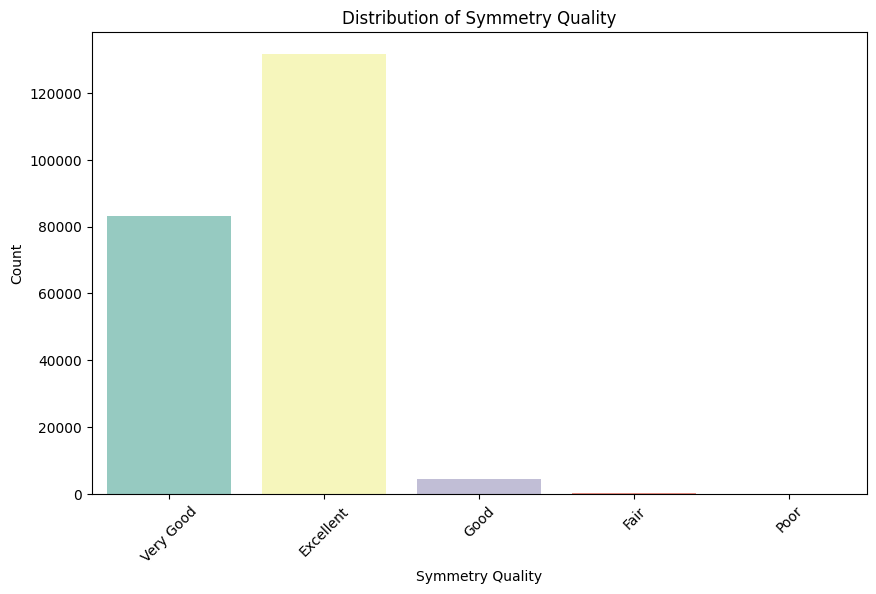

In [23]:
# Bar Chart of Symmetry vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='symmetry', palette='Set3')
plt.title("Distribution of Symmetry Quality")
plt.xlabel("Symmetry Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

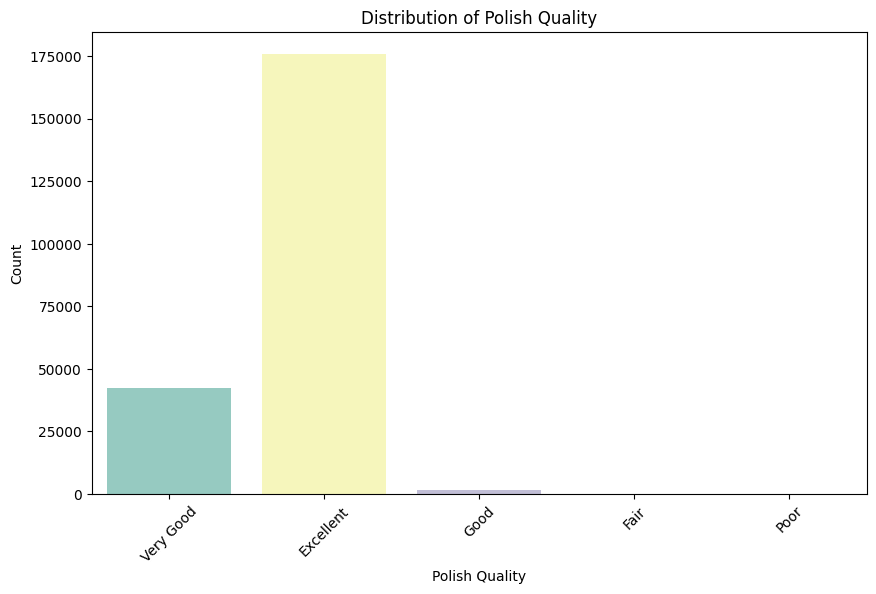

In [24]:
# Bar Chart of Polish vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='polish', palette='Set3')
plt.title("Distribution of Polish Quality")
plt.xlabel("Polish Quality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

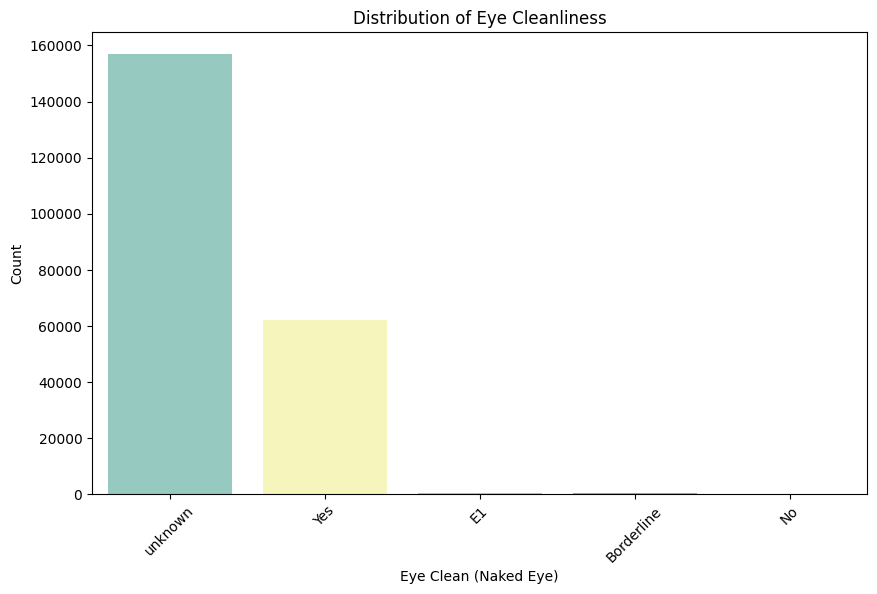

In [25]:
# Bar Chart of Eye Clean vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='eye_clean', palette='Set3')
plt.title("Distribution of Eye Cleanliness")
plt.xlabel("Eye Clean (Naked Eye)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


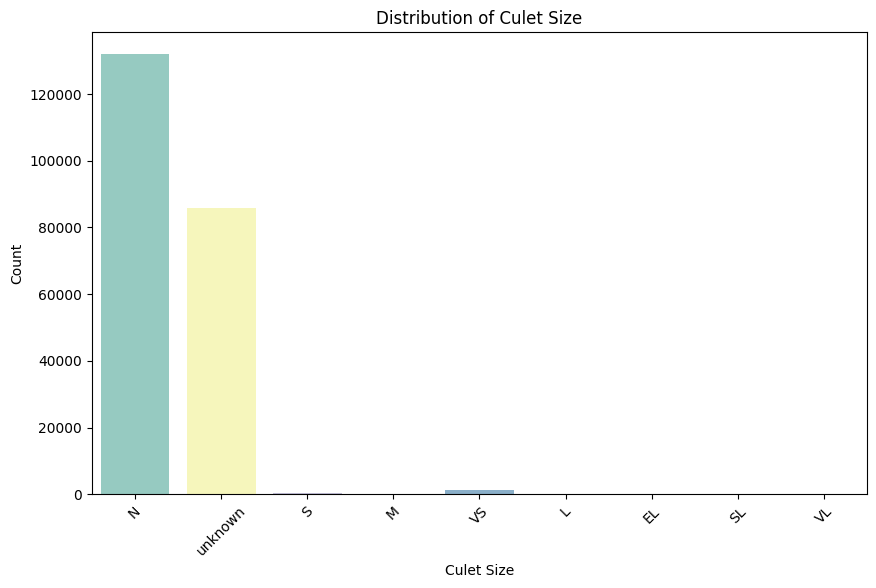

In [26]:
# Bar Chart of Culet Size vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='culet_size', palette='Set3')
plt.title("Distribution of Culet Size")
plt.xlabel("Culet Size")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

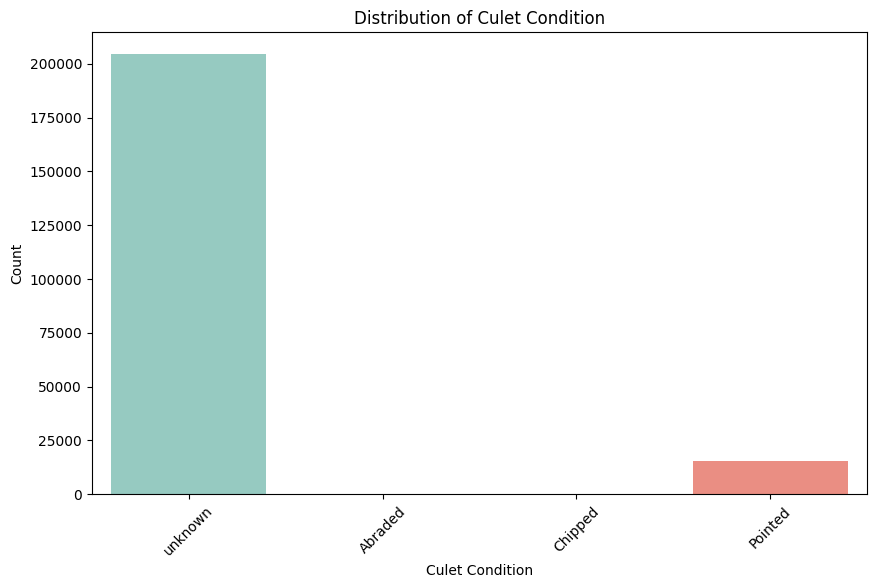

In [27]:
# Bar Chart of Culet Condition vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='culet_condition', palette='Set3')
plt.title("Distribution of Culet Condition")
plt.xlabel("Culet Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

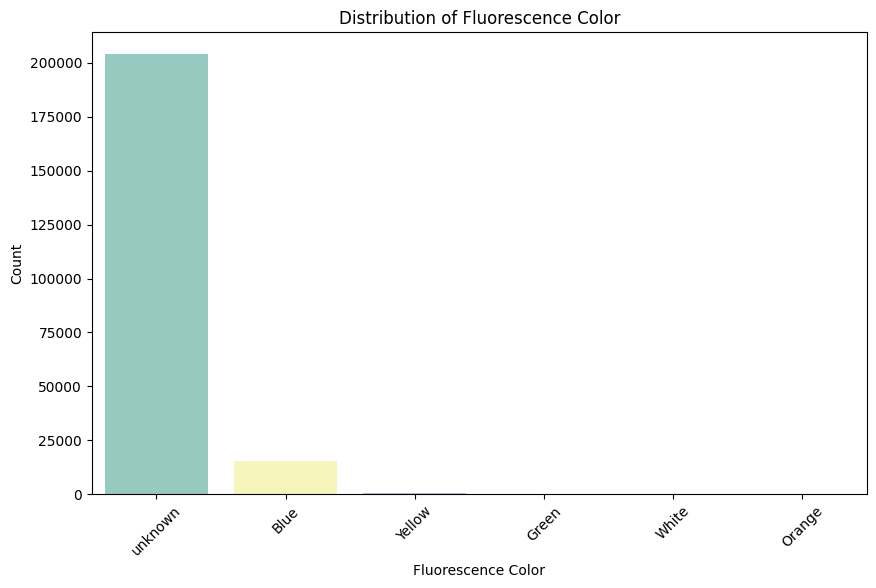

In [28]:
# Bar Chart of Fluorescence Color vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fluor_color', palette='Set3')
plt.title("Distribution of Fluorescence Color")
plt.xlabel("Fluorescence Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

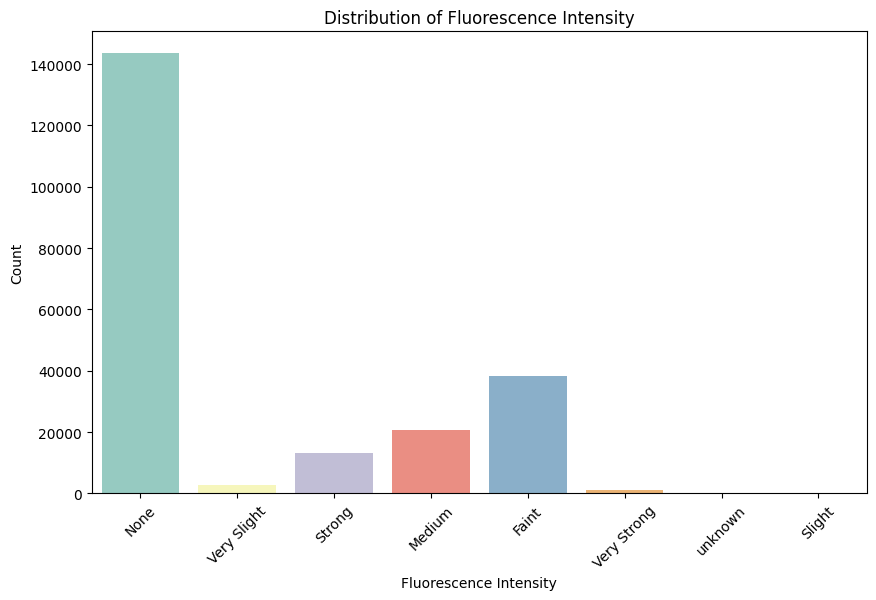

In [29]:
# Bar Chart of Fluorescence Intensity vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fluor_intensity', palette='Set3')
plt.title("Distribution of Fluorescence Intensity")
plt.xlabel("Fluorescence Intensity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

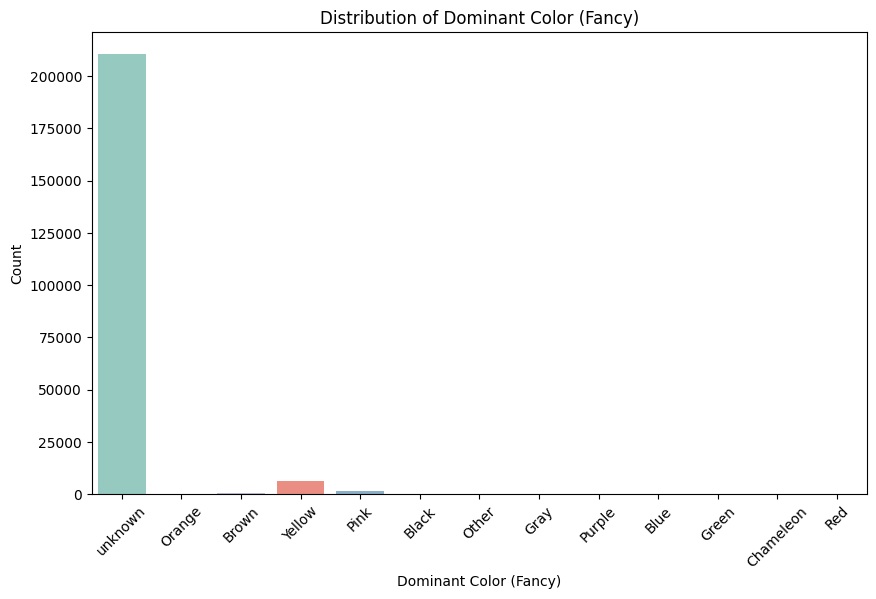

In [30]:
# Bar Chart of Fancy Color Dominant Color vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fancy_color_dominant_color', palette='Set3')
plt.title("Distribution of Dominant Color (Fancy)")
plt.xlabel("Dominant Color (Fancy)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

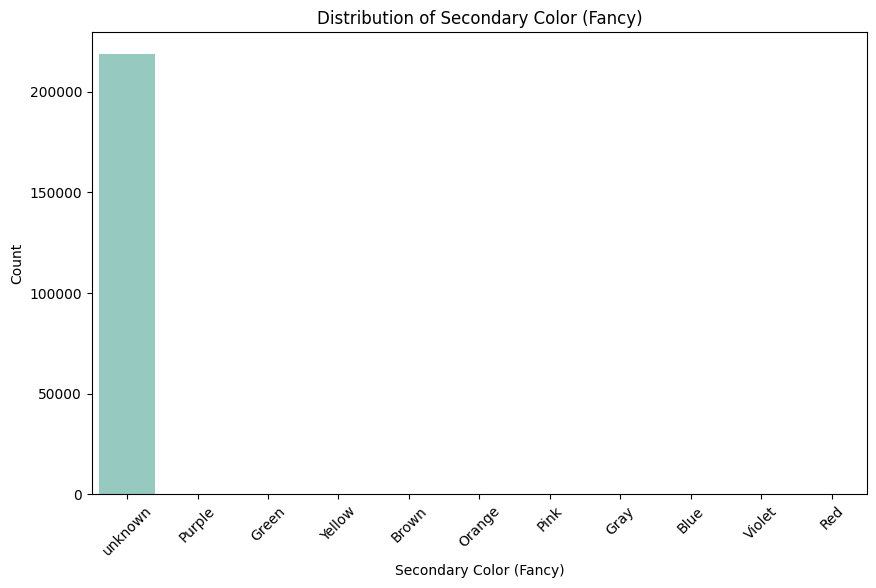

In [31]:
# Bar Chart of Fancy Color Secondary Color vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fancy_color_secondary_color', palette='Set3')
plt.title("Distribution of Secondary Color (Fancy)")
plt.xlabel("Secondary Color (Fancy)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

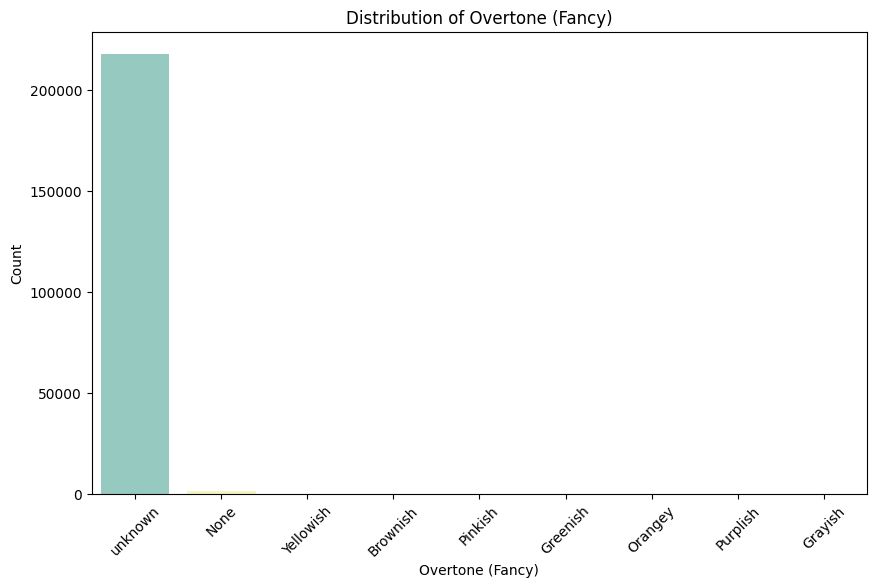

In [32]:
# Bar Chart of Fancy Color Overtone vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fancy_color_overtone', palette='Set3')
plt.title("Distribution of Overtone (Fancy)")
plt.xlabel("Overtone (Fancy)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

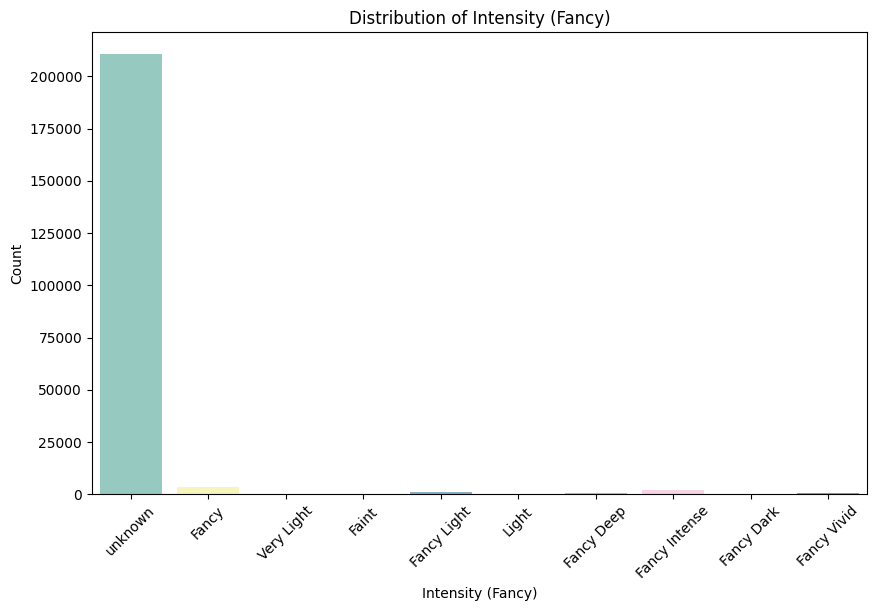

In [33]:
# Bar Chart of Fancy Color Intensity vs. Count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fancy_color_intensity', palette='Set3')
plt.title("Distribution of Intensity (Fancy)")
plt.xlabel("Intensity (Fancy)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

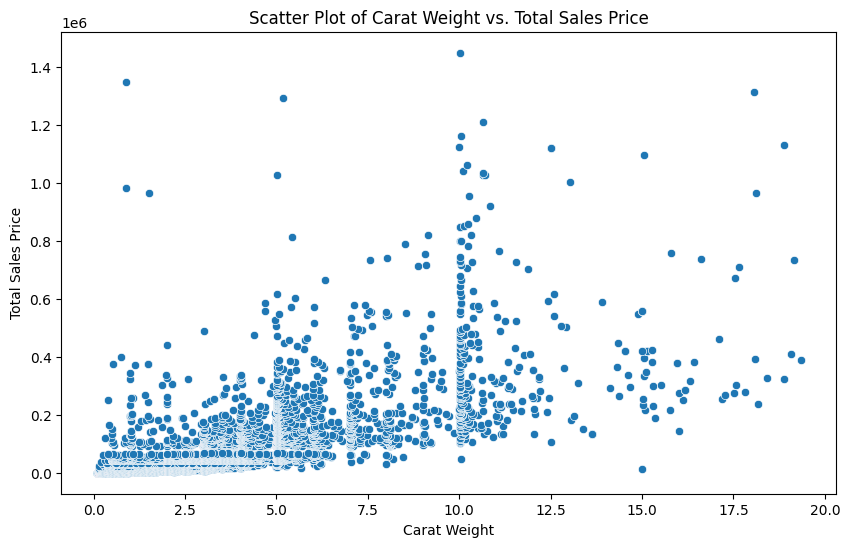

In [34]:
# Scatter Plot of Carat Weight vs. Total Sales Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat_weight', y='total_sales_price')
plt.title("Scatter Plot of Carat Weight vs. Total Sales Price")
plt.xlabel("Carat Weight")
plt.ylabel("Total Sales Price")
plt.show()

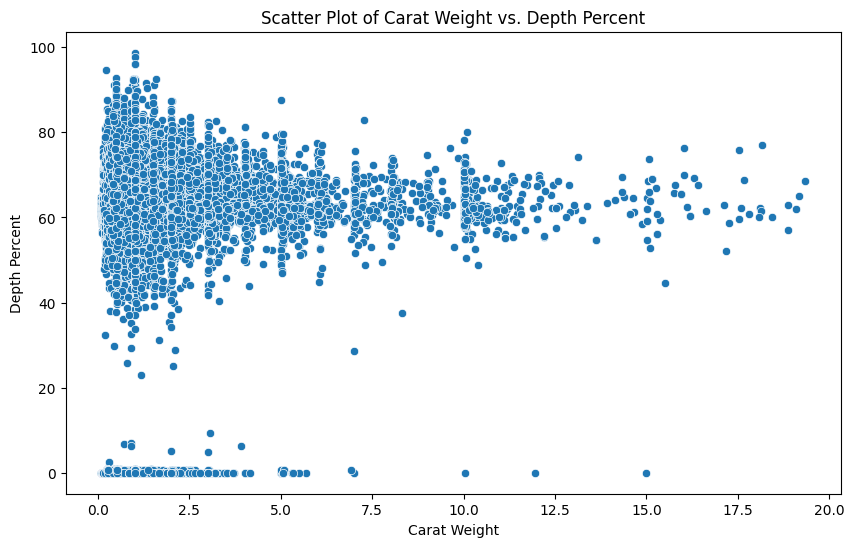

In [35]:
# Scatter Plot of Carat Weight vs. Depth Percent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat_weight', y='depth_percent')
plt.title("Scatter Plot of Carat Weight vs. Depth Percent")
plt.xlabel("Carat Weight")
plt.ylabel("Depth Percent")
plt.show()

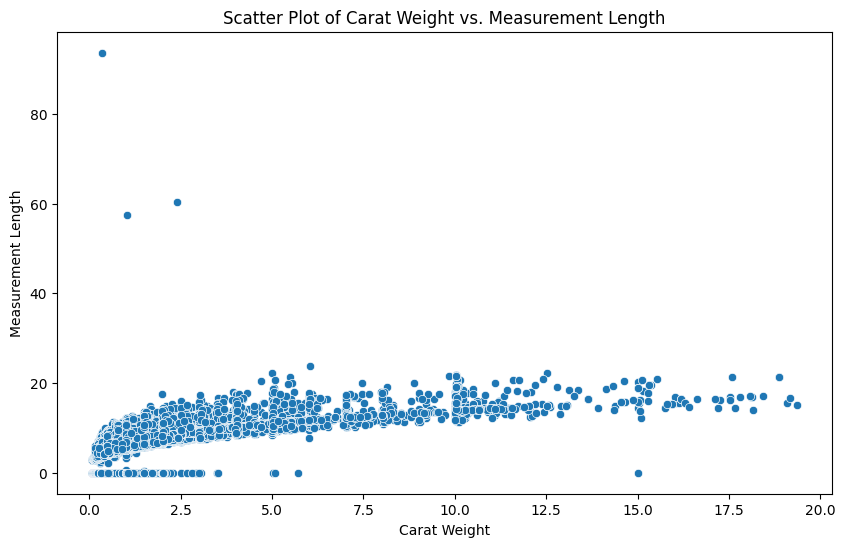

In [36]:

# Scatter Plot of Carat Weight vs. Measurement Length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat_weight', y='meas_length')
plt.title("Scatter Plot of Carat Weight vs. Measurement Length")
plt.xlabel("Carat Weight")
plt.ylabel("Measurement Length")
plt.show()

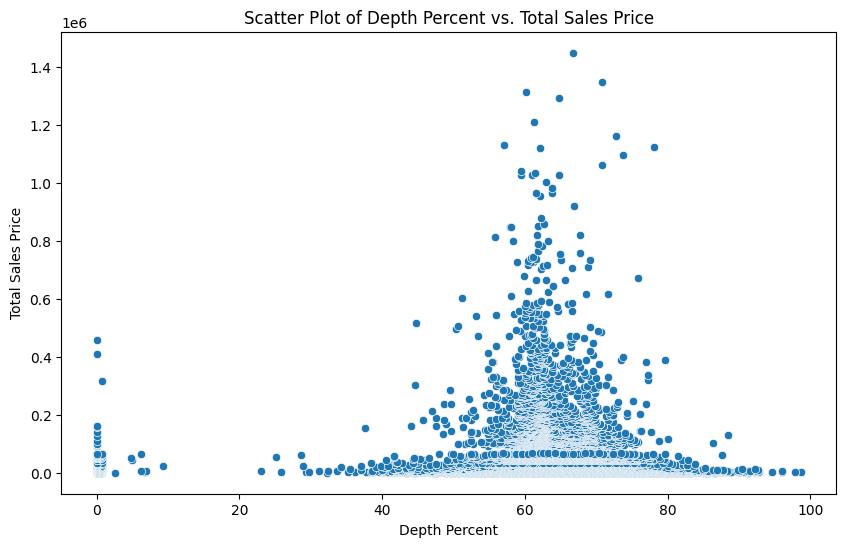

In [38]:
# Scatter Plot of Depth Percent vs. Total Sales Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depth_percent', y='total_sales_price')
plt.title("Scatter Plot of Depth Percent vs. Total Sales Price")
plt.xlabel("Depth Percent")
plt.ylabel("Total Sales Price")
plt.show()

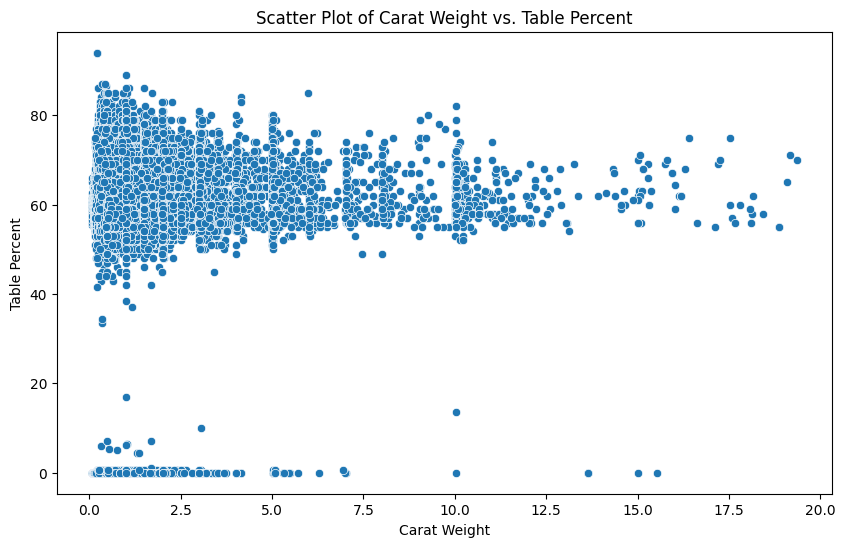

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat_weight', y='table_percent')
plt.title("Scatter Plot of Carat Weight vs. Table Percent")
plt.xlabel("Carat Weight")
plt.ylabel("Table Percent")
plt.show()


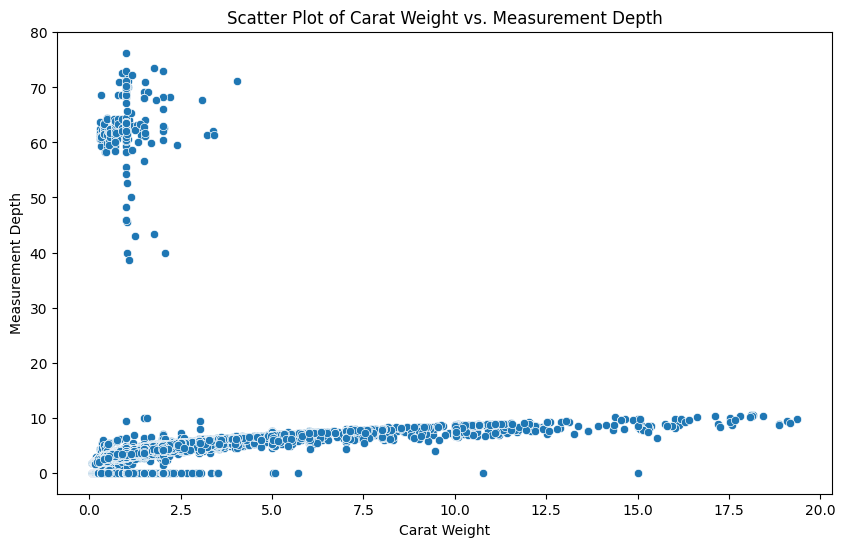

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat_weight', y='meas_depth')
plt.title("Scatter Plot of Carat Weight vs. Measurement Depth")
plt.xlabel("Carat Weight")
plt.ylabel("Measurement Depth")
plt.show()
